# 1. Data Wrangling

In [1]:
import pandas as pd, numpy as np, matplotlib as plt
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as pltm
from scipy import stats

In [2]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


In [4]:
print(df.head())

   Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0          35.560            1.6       8             256       1.60    978  
1          39.624            2.0       4             256       2.20    634  
2          39.624            2.7       8             256       2.20    946  
3          33.782            1.6       8             128       1.22   1244  
4          39.624            1.8       8             256       1.91    837  


In [5]:
#round up the screensizecm that all values are rounded to nearest 2 decimal places
df['Screen_Size_cm'] = np.round(df['Screen_Size_cm'],2)

#drop the unnecessary column
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [6]:
#task 1, evaluate missing data
miss = df.isnull()

for column in miss:
    print(column)
    print(miss[column].value_counts())

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64
Category
Category
False    238
Name: count, dtype: int64
Screen
Screen
False    238
Name: count, dtype: int64
GPU
GPU
False    238
Name: count, dtype: int64
OS
OS
False    238
Name: count, dtype: int64
CPU_core
CPU_core
False    238
Name: count, dtype: int64
Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64
CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64
RAM_GB
RAM_GB
False    238
Name: count, dtype: int64
Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64
Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64
Price
Price
False    238
Name: count, dtype: int64


In [7]:
# task 2 replace with mean and mode
mean = df['Weight_kg'].astype('float').mean()
df['Weight_kg'].replace(np.nan, mean, inplace = True)
print(df['Weight_kg'].isnull().value_counts())

mode = df['Screen_Size_cm'].value_counts().idxmax()
df['Screen_Size_cm'].replace(np.nan, mode, inplace = True)
print(df['Screen_Size_cm'].isnull().value_counts())

Weight_kg
False    238
Name: count, dtype: int64
Screen_Size_cm
False    238
Name: count, dtype: int64


C:\Users\Alexander\AppData\Local\Temp\ipykernel_22260\3239264871.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].replace(np.nan, mean, inplace = True)
C:\Users\Alexander\AppData\Local\Temp\ipykernel_22260\3239264871.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [8]:
#task 3 fixing the datatypes
df[['Weight_kg','Screen_Size_cm']] = df[['Weight_kg','Screen_Size_cm']].astype('float')

In [9]:
#task 4 data standardization
df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54
df.rename(columns = {'Screen_Size_cm' : 'Screen_Size_inch'}, inplace = True)

df['Weight_kg'] = df['Weight_kg'] * 2.205
df.rename(columns = {'Weight_kg' : 'Weight_pounds'}, inplace = True)

df[['Screen_Size_inch', 'Weight_pounds']]

,Screen_Size_inch,Weight_pounds
0,14.000000,3.52800
1,15.598425,4.85100
2,15.598425,4.85100
3,13.299213,2.69010
4,15.598425,4.21155
...,...,...
233,14.000000,3.74850
234,13.299213,2.64600
235,12.000000,2.99880
236,15.598425,5.29200


In [10]:
#task 5 data normalization
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()
df[['CPU_frequency']]

,CPU_frequency
0,0.551724
1,0.689655
2,0.931034
3,0.551724
4,0.620690
...,...
233,0.896552
234,0.827586
235,0.896552
236,0.862069


In [11]:
#task 6 binning
name = ['low','medium','high']
bins = np.linspace(df['Price'].min(), df['Price'].max(), 4)
df['Price-Binned'] = pd.cut(df['Price'], bins, labels = name, include_lowest = True)
df[['Price-Binned','Price']]

,Price-Binned,Price
0,low,978
1,low,634
2,low,946
3,low,1244
4,low,837
...,...,...
233,medium,1891
234,medium,1950
235,medium,2236
236,low,883


<BarContainer object of 3 artists>

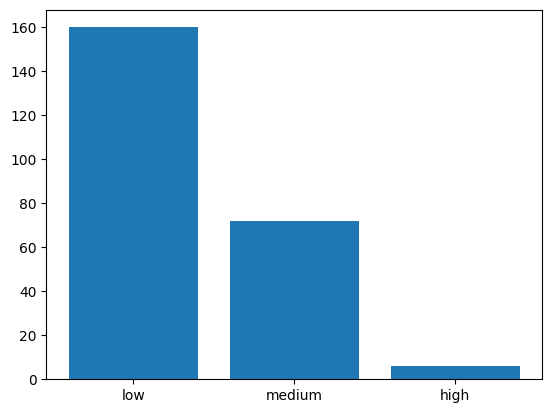

In [12]:
#plot the graph
plt.pyplot.bar(name, df['Price-Binned'].value_counts())

In [13]:
# 6. indicator variable
dummyvar1 = pd.get_dummies(df['Screen'])
dummyvar1.rename(columns = {'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace = True)
df = pd.concat([df, dummyvar1], axis = 1)
df.drop('Screen', axis = 1, inplace = True)

In [14]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-Binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,low,False,True
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,low,True,False
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,low,True,False
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,low,False,True
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,low,True,False


# 2. Exploratory Data Analysis

## Task 1 - Visualize Individual Feature Patterns

**Continuous Valued Features**

<Axes: xlabel='CPU_frequency', ylabel='Price'>

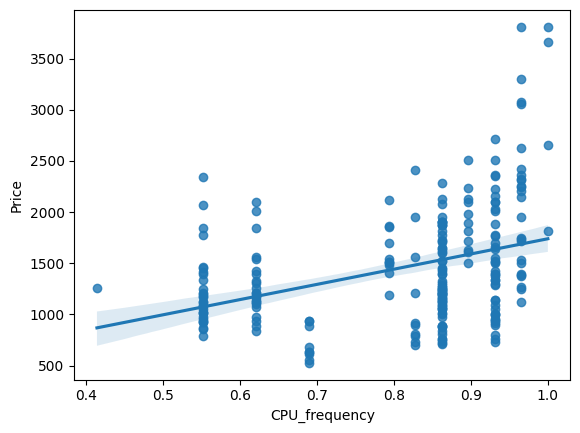

In [15]:
sns.regplot(x = 'CPU_frequency', y = 'Price', data = df)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

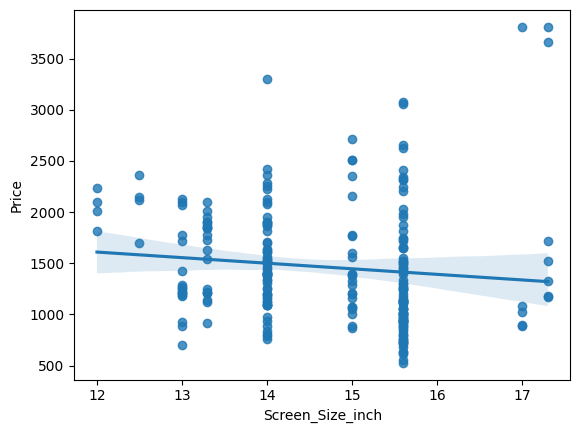

In [16]:
sns.regplot(x='Screen_Size_inch', y='Price', data = df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

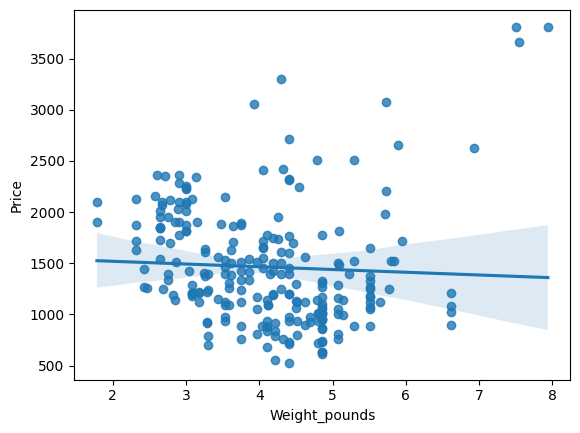

In [17]:
sns.regplot(x='Weight_pounds', y='Price', data=df)

In [18]:
for param in ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']:
    print("The correlation value between",param,"vs Price:",df[[param,'Price']].corr(),'\n')

The correlation value between CPU_frequency vs Price:                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000 

The correlation value between Screen_Size_inch vs Price:                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110565
Price                    -0.110565  1.000000 

The correlation value between Weight_pounds vs Price:                Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000 



**Categorical Features**

Axes(0.125,0.11;0.775x0.77)


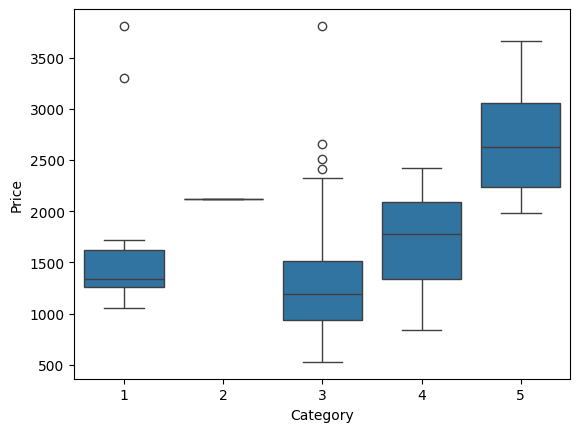

In [19]:
print(sns.boxplot(x = 'Category', y = 'Price', data = df))

Axes(0.125,0.11;0.775x0.77)


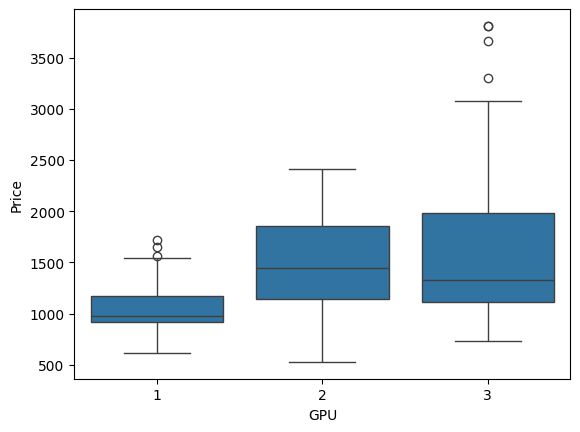

In [20]:
print(sns.boxplot(x = 'GPU', y = 'Price', data = df))

Axes(0.125,0.11;0.775x0.77)


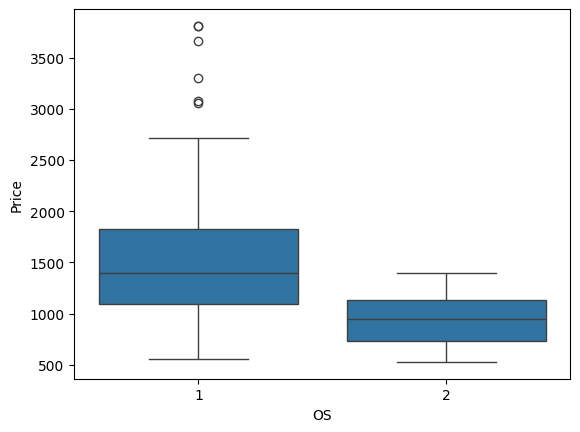

In [21]:
print(sns.boxplot(x = 'OS', y = 'Price', data = df))

Axes(0.125,0.11;0.775x0.77)


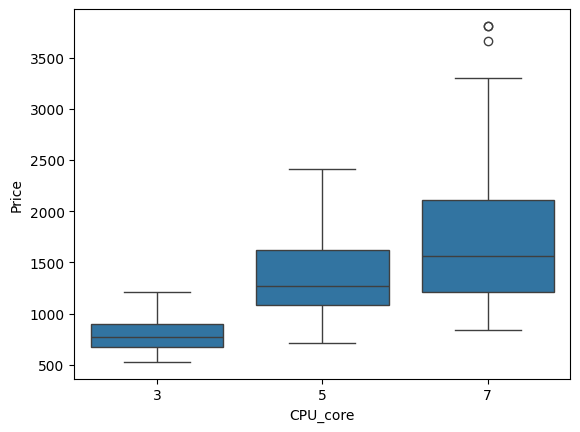

In [22]:
print(sns.boxplot(x = 'CPU_core', y = 'Price', data = df))

Axes(0.125,0.11;0.775x0.77)


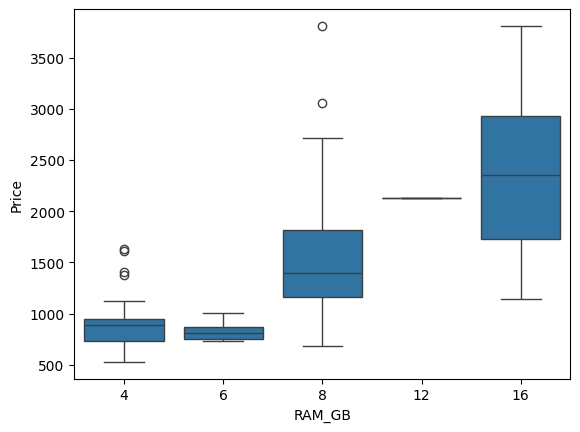

In [23]:
print(sns.boxplot(x = 'RAM_GB', y = 'Price', data = df))

Axes(0.125,0.11;0.775x0.77)


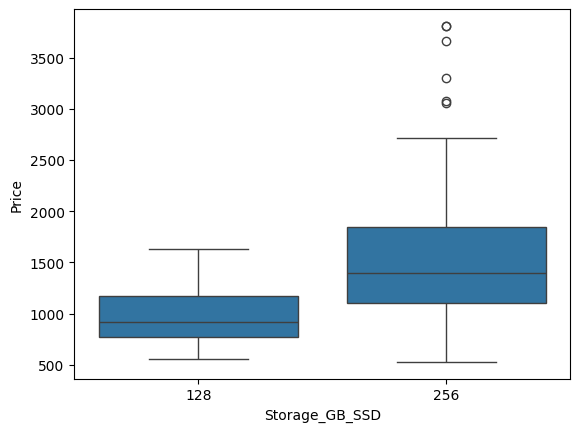

In [24]:
print(sns.boxplot(x = 'Storage_GB_SSD', y = 'Price', data = df))

## Task 2 - Descriptive Statistical Analysis

In [25]:
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,14.687951,0.813822,7.882353,245.781513,4.106221,1462.344538
std,0.776533,0.638282,0.235790,1.241787,1.165589,0.141860,2.482603,34.765316,1.078442,574.607699
min,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000
25%,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000
50%,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000
75%,4.000000,3.000000,1.000000,7.000000,15.598425,0.931034,8.000000,256.000000,4.851000,1777.000000
max,5.000000,3.000000,2.000000,7.000000,17.299213,1.000000,16.000000,256.000000,7.938000,3810.000000


In [26]:
df.describe(include = ['object'])

,Manufacturer
count,238
unique,11
top,Dell
freq,71


## Task 3 - Groupby and Pivot Table

**Grouping**

In [27]:
sub = df[['GPU','CPU_core','Price']]
grouped = sub.groupby(['GPU','CPU_core'], as_index = False).mean()
grouped

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


**Pivot**

In [28]:
pivot = grouped.pivot(index = 'GPU', columns = 'CPU_core')
pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

**HeatMap**

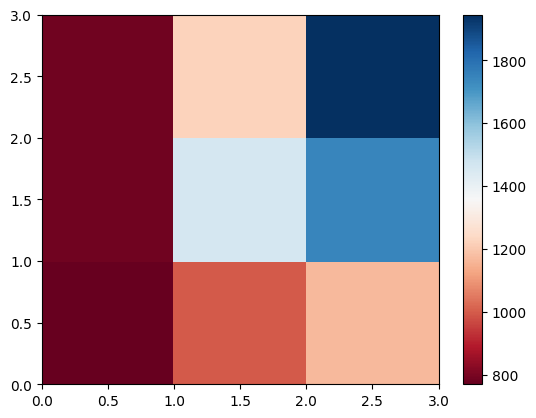

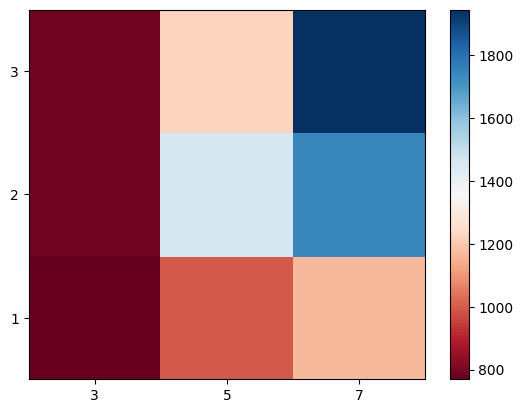

In [29]:
pltm.pcolor(pivot, cmap = 'RdBu')
pltm.colorbar() #to put the colour range
pltm.show()

fig, ax = pltm.subplots() #duplicate the raw plot that we want to modify
im = ax.pcolor(pivot, cmap = 'RdBu')

#the naming way and its location based in pivot table
#create the label names
x_label = pivot.columns.levels[1] #column name will become horizontal
y_label = pivot.index #index will become the vertical

#move ticks and labels to the center at each grid
ax.set_xticks(np.arange(pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(x_label, minor=False)
ax.set_yticklabels(y_label, minor=False)


fig.colorbar(im)
pltm.show()

## Task 4 - Pearson Correlation and P Values

In [30]:
## Task 4 - Pearson Correlation and P Values

for parameter in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson, pval = stats.pearsonr(df[parameter], df['Price'])
    print(parameter, pearson, pval)
    

RAM_GB 0.5492972971857841 3.681560628842973e-20
CPU_frequency 0.36666555892588604 5.502463350713339e-09
Storage_GB_SSD 0.24342075521810302 0.00014898923191723976
Screen_Size_inch -0.11056471275425056 0.08876456732700826
Weight_pounds -0.050312258377515476 0.43976938534338894
CPU_core 0.4593977773355115 7.912950127009359e-14
OS -0.22172980114827384 0.000569664255924674
GPU 0.28829819888814273 6.166949698364437e-06
Category 0.2862427558126413 7.225696235806605e-06


# 3. Model Development

In [31]:
import matplotlib.pyplot as pltm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

## Task 1 - Single Linear Regression

In [32]:
#Create the regression model
x = df[['CPU_frequency']]
y = df[['Price']]

lm = LinearRegression()

lm.fit(x,y)

yhat = lm.predict(x)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_22260\3013036033.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Value')
C:\Users\Alexander\AppData\Local\Temp\ipykernel_22260\3013036033.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

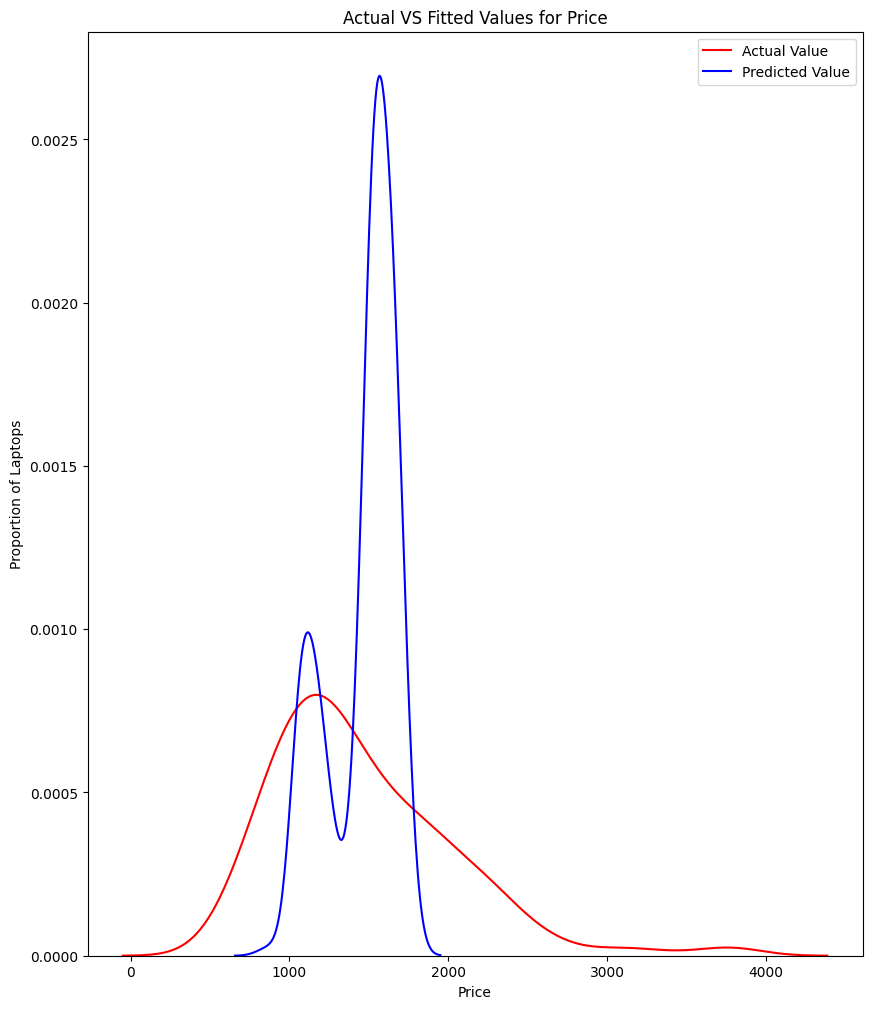

In [33]:
#create a distribution plot
pltm.figure(figsize = (10,12))

ax1 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(yhat, hist = False, color = 'b', label = 'Fitted Value')

pltm.title('Actual VS Fitted Values for Price')
pltm.xlabel("Price")
pltm.ylabel("Proportion of Laptops")
pltm.legend(['Actual Value','Predicted Value'])
pltm.show()

In [34]:
#Evaluate the mean standard error and r squared
print(lm.score(x,y)) #R^2

mse = mean_squared_error(df['Price'], yhat)
print(mse)

0.1344436321024326
284583.4405868629


## Task 2: Multiple Linear Regression

In [35]:
#Create the model
c = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]

lm1 = LinearRegression()

lm1.fit(c,y)

Yhat = lm1.predict(c)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_22260\552445663.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Value')
C:\Users\Alexander\AppData\Local\Temp\ipykernel_22260\552445663.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

Text(0, 0.5, 'Proportion of laptops')

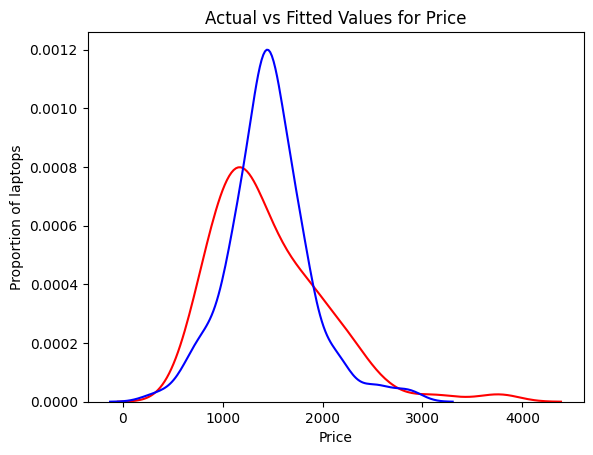

In [36]:
#Create the Distribution Plot
ax2 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Yhat, hist = False, color = 'b', label = 'Fitted Values')

pltm.title('Actual vs Fitted Values for Price')
pltm.xlabel('Price')
pltm.ylabel('Proportion of laptops')

In [37]:
r2 = lm1.score(c,y)
mse = mean_squared_error(df['Price'], Yhat)
print(r2, mse)

0.5082509055187374 161680.57263893107


## Task 3 - Polynomial Regression

In [38]:
#define the variable
d = df['CPU_frequency']
e = df['Price']
f1 = np.polyfit(d,e,1)
p1 = np.poly1d(f1)

f3 = np.polyfit(d,e,3)
p3 = np.poly1d(f3)

f5 = np.polyfit(d,e,5)
p5 = np.poly1d(f5)

In [39]:
def plotpollynomial(model, indVar, depVar, name):
    x_new = np.linspace(indVar.min(),depVar.max(),100)
    y_new = model(x_new)
    
    pltm.plot(indVar, depVar, '.', x_new, y_new, '-')
    pltm.title('Polynomial Fit For Price ~ CPU Frequency')
    ax = pltm.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = pltm.gcf()
    pltm.xlabel(name)
    pltm.ylabel('Price of Laptops')
    
    pltm.show()

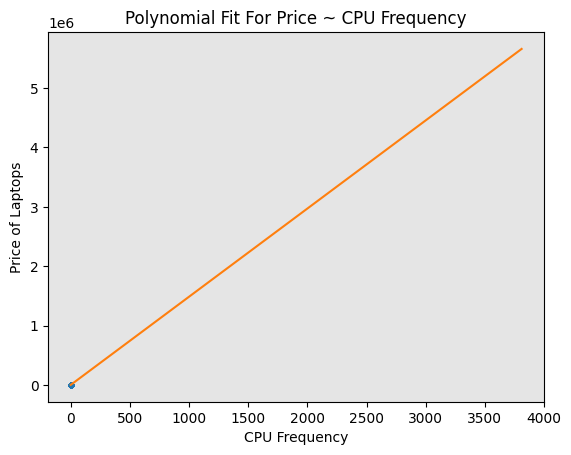

In [40]:
#visualize the result order 1
plotpollynomial(p1, d, e, 'CPU Frequency')

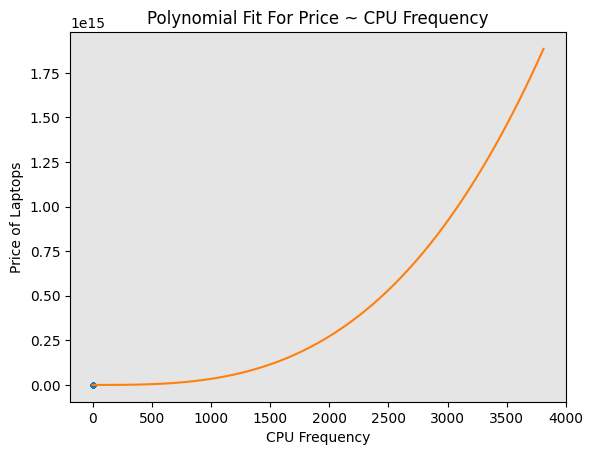

In [41]:
#visualize the result order 3
plotpollynomial(p3, d, e, 'CPU Frequency')

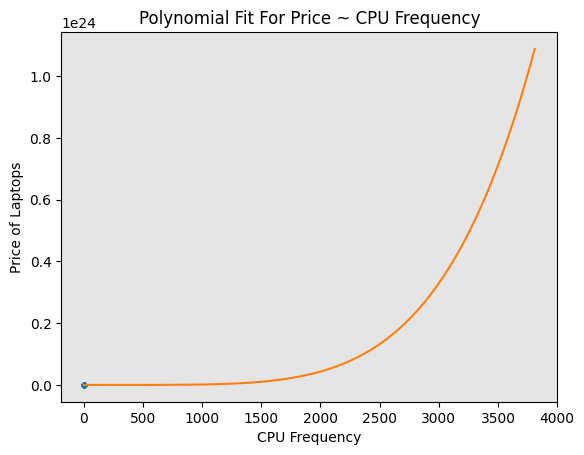

In [42]:
#visualize the result order 5
plotpollynomial(p5, d, e, 'CPU Frequency')

In [43]:
r1 = r2_score(e, p1(d)) #r2 score is come from sk2learn.metrics
r1

0.1344436321024326

## Task 4 Pipeline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [54]:
Input = [('Scale',StandardScaler()), ('Polynomial', PolynomialFeatures(include_bias=False)),('Model', LinearRegression()) ]

pipe = Pipeline(Input)
pipe

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('Model', LinearRegression())])

In [55]:
c = c.astype(float)
pipe.fit(c,y)

#we want predict the ypipe or output from the c as the input
ypipe = pipe.predict(c)

In [56]:
#evaluate the MSE
mse = mean_squared_error(y, ypipe)
print ("mse: ",mse)

rscore = r2_score(y, ypipe)
print ("R^2 Score:", rscore)

mse:  120604.77738888524
R^2 Score: 0.633182335372197
